We're here today to examine my Spotify playlist entitled <a href=https://open.spotify.com/playlist/6NEO9UMjh1buQqiRTqurLa>Electronic, Trap, Chiptune, etc.</a>

For this notebook, I want to know what type of characteristics of a song will fit in my playlist.

We will be comparing this to songs from a more recent playlist from  <a href=https://open.spotify.com/playlist/5JGIEOoHqA3x8ODIV2mBpf>KISS FM UK | Playlist 2020</a>

Big thanks to https://github.com/nabehrens as this was inspired by his/her work.



# Import

In [1]:
import pandas as pd #Dataframe, Series
import numpy as np

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

from matplotlib import pyplot as plt
import seaborn as sns

import graphviz
import pydotplus
import io

from scipy import misc

from sklearn.metrics import accuracy_score

import spotipy
import spotipy.util as util
import spotipy.oauth2 as oauth2

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


Bad key "text.kerning_factor" on line 4 in
/Users/Verne/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


# Spotify Login

In [2]:
# credentials.
user_id = 'Electronic, Trap, Chiptune, etc.'
playlist_id = '6NEO9UMjh1buQqiRTqurLa'

uk_id = 'KISS FM UK | Playlist 2020'
uk_playlist_id = '5JGIEOoHqA3x8ODIV2mBpf'

client_id = '5c8bd4e114b6410595f6a14d1e37caec'
client_secret = 'ae06517528314243a7a7f52110c989e5'



In [3]:
# had to change this to the more recent version to get this to work instead of the redirect uri one.
credentials = oauth2.SpotifyClientCredentials(
        client_id=client_id,
        client_secret=client_secret)

token = credentials.get_access_token()

In [4]:
sp = spotipy.Spotify(auth=token)

In [5]:
own_playlist = sp.user_playlist(user_id, playlist_id)
uk_playlist = sp.user_playlist(uk_id, uk_playlist_id)

In [6]:
# own playlist.
own_tracks = own_playlist["tracks"]
own_songs = own_tracks["items"] 
while own_tracks['next']:
    own_tracks = sp.next(own_tracks)
    for item in own_tracks["items"]:
        own_songs.append(item)
own_ids = [] 
print(len(own_songs))
for i in range(len(own_songs)):
    own_ids.append(own_songs[i]['track']['id'])
# own_tracks

108


In [7]:
# uk playlist
uk_tracks = uk_playlist["tracks"]
uk_songs = uk_tracks["items"] 
while uk_tracks['next']:
    uk_tracks = sp.next(uk_tracks)
    for item in uk_tracks["items"]:
        uk_songs.append(item)
uk_ids = [] 
print(len(uk_songs))
for i in range(len(uk_songs)):
    uk_ids.append(uk_songs[i]['track']['id'])



99


In [8]:
own_artist_pop = []
uk_artist_pop = []
for i in range(0,len(own_tracks)):
    own_tracks

# Merge both playlists

In [9]:
features = []
inSavedTracks = []
j = 0
for i in range(0,len(own_ids),50):
    audio_features = sp.audio_features(own_ids[i:i+50])
    for track in audio_features:
        features.append(track)
        track = own_songs[j]
        j= j+1
        features[-1]['artist'] = track['track']['artists'][0]['name']
        features[-1]['name'] = track['track']['name']
        features[-1]['trackPopularity'] = track['track']['popularity']
        features[-1]['artistPopularity'] = sp.artist(track['track']['artists'][0]['id'])['popularity']
        features[-1]['liked'] = 1
j = 0
for i in range(0,len(uk_ids),50):
    audio_features = sp.audio_features(uk_ids[i:i+50])
    for track in audio_features:
        features.append(track)
        track = own_songs[j]
        j= j+1
        features[-1]['artist'] = track['track']['artists'][0]['name']
        features[-1]['name'] = track['track']['name']
        features[-1]['trackPopularity'] = track['track']['popularity']
        features[-1]['artistPopularity'] = sp.artist(track['track']['artists'][0]['id'])['popularity']
        features[-1]['liked'] = 0

retrying ...3secs


In [14]:
join = pd.DataFrame(features)
join

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,uri,track_href,analysis_url,duration_ms,time_signature,artist,name,trackPopularity,artistPopularity,liked
0,0.276,0.796,0,-4.499,1,0.0579,0.00293,0.000000,0.1840,0.260,...,spotify:track:3ISYGHoYnu4gos6JNMfL4z,https://api.spotify.com/v1/tracks/3ISYGHoYnu4g...,https://api.spotify.com/v1/audio-analysis/3ISY...,218965,4,Porter Robinson,Shelter,3,66,1
1,0.586,0.853,1,-2.798,1,0.0498,0.00708,0.003110,0.4010,0.467,...,spotify:track:72yrTOnehmi3S82axqhEkF,https://api.spotify.com/v1/tracks/72yrTOnehmi3...,https://api.spotify.com/v1/audio-analysis/72yr...,188200,3,Wolfgang Gartner,Redline - Radio Edit,10,52,1
2,0.582,0.603,1,-6.776,1,0.0295,0.25200,0.000613,0.0706,0.307,...,spotify:track:70ZvEYmbe5jMKv6xJr97Yc,https://api.spotify.com/v1/tracks/70ZvEYmbe5jM...,https://api.spotify.com/v1/audio-analysis/70Zv...,226099,4,Qreepz,Wednesday,19,19,1
3,0.706,0.321,4,-12.920,1,0.2140,0.61900,0.639000,0.1200,0.105,...,spotify:track:6ECka4UKqtJvFpJUYcbWZY,https://api.spotify.com/v1/tracks/6ECka4UKqtJv...,https://api.spotify.com/v1/audio-analysis/6ECk...,271315,4,Kimyan Law,Eclairage,23,31,1
4,0.780,0.763,6,-3.908,1,0.0631,0.00425,0.614000,0.6510,0.351,...,spotify:track:6sZmgTsyiF9ObnEniMISIc,https://api.spotify.com/v1/tracks/6sZmgTsyiF9O...,https://api.spotify.com/v1/audio-analysis/6sZm...,371000,4,Zedd,The Legend Of Zelda - Original Mix,0,82,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,0.676,0.771,8,-3.675,1,0.0483,0.02370,0.000007,0.1020,0.569,...,spotify:track:3jjujdWJ72nww5eGnfs2E7,https://api.spotify.com/v1/tracks/3jjujdWJ72nw...,https://api.spotify.com/v1/audio-analysis/3jju...,207133,4,Kacey Musgraves,High Horse,68,75,0
203,0.774,0.747,1,-3.908,0,0.0820,0.02410,0.000006,0.3420,0.833,...,spotify:track:6fenHIxXuuzKB55wY4WCHP,https://api.spotify.com/v1/tracks/6fenHIxXuuzK...,https://api.spotify.com/v1/audio-analysis/6fen...,168125,4,AdhesiveWombat,8 Bit Adventure,37,36,0
204,0.795,0.779,11,-5.413,1,0.1770,0.10900,0.000014,0.0836,0.783,...,spotify:track:584UC3Qpm8SbYd7aRWKREu,https://api.spotify.com/v1/tracks/584UC3Qpm8Sb...,https://api.spotify.com/v1/audio-analysis/584U...,211787,4,Kaskade,Steppin' Out,29,71,0
205,0.531,0.750,10,-5.831,0,0.1110,0.00632,0.000076,0.1170,0.198,...,spotify:track:57vxBYXtHMk6H1aD29V7PU,https://api.spotify.com/v1/tracks/57vxBYXtHMk6...,https://api.spotify.com/v1/audio-analysis/57vx...,200080,4,Jamiroquai,Time Won't Wait,45,69,0


In [15]:
join.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 23 columns):
danceability        207 non-null float64
energy              207 non-null float64
key                 207 non-null int64
loudness            207 non-null float64
mode                207 non-null int64
speechiness         207 non-null float64
acousticness        207 non-null float64
instrumentalness    207 non-null float64
liveness            207 non-null float64
valence             207 non-null float64
tempo               207 non-null float64
type                207 non-null object
id                  207 non-null object
uri                 207 non-null object
track_href          207 non-null object
analysis_url        207 non-null object
duration_ms         207 non-null int64
time_signature      207 non-null int64
artist              207 non-null object
name                207 non-null object
trackPopularity     207 non-null int64
artistPopularity    207 non-null int64
liked       

# Correlation

In [16]:
# for the graphs.
colors = ['#A8D3DA', '#FFA34D']
palette = sns.color_palette(colors)
sns.set_palette(palette)
sns.set_style('white')

In [17]:
import plotly
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot

import cufflinks

cufflinks.go_offline()

# Set global theme
cufflinks.set_config_file(world_readable=True, theme='pearl')

# Display all cell outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

corrs = join.corr()

figure = ff.create_annotated_heatmap(
    z=corrs.values,
    x=list(corrs.columns),
    y=list(corrs.index),
    colorscale='viridis',
    annotation_text=corrs.round(2).values,
    showscale=True, reversescale=True)

figure.layout.margin = dict(l=0, t=0)
figure.layout.height = 800
figure.layout.width = 800

iplot(figure)

In [18]:
# defintion of liked, not liked for involved columns.
pos_tempo = join[join['liked'] == 1]['tempo']
neg_tempo = join[join['liked'] == 0]['tempo']
pos_dance = join[join['liked'] == 1]['danceability']
neg_dance = join[join['liked'] == 0]['danceability']
pos_duration = join[join['liked'] == 1]['duration_ms']
neg_duration = join[join['liked'] == 0]['duration_ms']
pos_loudness = join[join['liked'] == 1]['loudness']
neg_loudness = join[join['liked'] == 0]['loudness']
pos_instrumentalness = join[join['liked'] == 1]['instrumentalness']
neg_instrumentalness = join[join['liked'] == 0]['instrumentalness']
pos_valence = join[join['liked'] == 1]['valence']
neg_valence = join[join['liked'] == 0]['valence']
pos_energy = join[join['liked'] == 1]['energy']
neg_energy = join[join['liked'] == 0]['energy']
pos_acousticness = join[join['liked'] == 1]['acousticness']
neg_acousticness = join[join['liked'] == 0]['acousticness']
pos_popularity = join[join['liked'] == 1]['trackPopularity']
neg_popularity = join[join['liked'] == 0]['trackPopularity']
pos_a_popularity = join[join['liked'] == 1]['artistPopularity']
neg_a_popularity = join[join['liked'] == 0]['artistPopularity']

In [19]:
# testing for popularity to see if the liked actually works.
print(pos_popularity)
print(neg_popularity)

0       3
1      10
2      19
3      23
4       0
       ..
103    23
104    40
105    21
106    29
107    55
Name: trackPopularity, Length: 108, dtype: int64
108     3
109    10
110    19
111    23
112     0
       ..
202    68
203    37
204    29
205    45
206    69
Name: trackPopularity, Length: 99, dtype: int64


In [20]:
join_two = join.select_dtypes(include=[np.number]).dropna()
# join_two = join_two.drop('liked', axis=1)
join_two.to_csv('join_two.csv')

In [21]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(join_two, 20))

Top Absolute Correlations
energy            loudness            0.712792
                  acousticness        0.510676
loudness          acousticness        0.497001
instrumentalness  liked               0.490826
loudness          instrumentalness    0.483100
instrumentalness  duration_ms         0.475397
danceability      valence             0.450614
duration_ms       liked               0.448124
danceability      liked               0.392008
valence           liked               0.340252
trackPopularity   artistPopularity    0.333661
valence           duration_ms         0.327472
loudness          valence             0.306855
danceability      tempo               0.295884
instrumentalness  valence             0.287387
energy            valence             0.239127
instrumentalness  artistPopularity    0.233422
danceability      speechiness         0.230292
loudness          artistPopularity    0.220965
key               mode                0.208093
dtype: float64


We're ignoring liked since its our target variable.

The basis for this would be an absolute pearson correlation of at least 0.30 absolute correlation as a threshold as indicated above. This is what we're using and we're choosing all the variables that are partnered above this threshold saved for liked.

# EDA. Initial Look

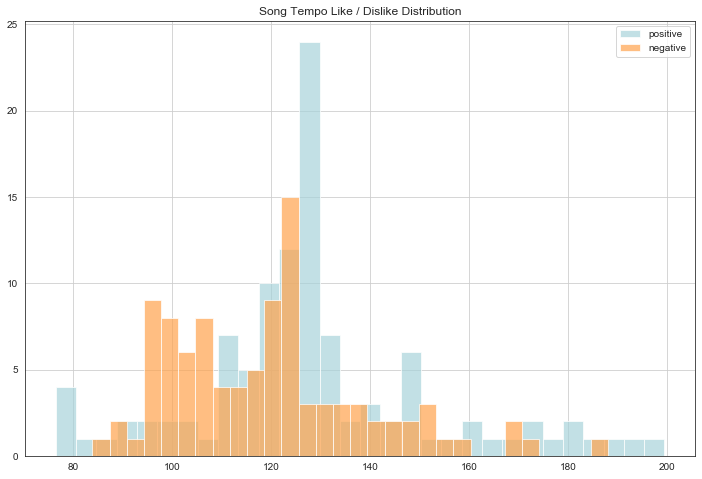

In [22]:
fig = plt.figure(figsize=(12,8))
plt.title("Song Tempo Like / Dislike Distribution")
pos_tempo.hist(alpha=0.7, bins=30, label='positive')
neg_tempo.hist(alpha=0.7, bins=30, label='negative')
plt.legend(loc='upper right');


Feels like a lot of activity happening in energy, danceability, loudness, artist popularity, and valence.

In [23]:
join_two

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,trackPopularity,artistPopularity,liked
0,0.276,0.796,0,-4.499,1,0.0579,0.00293,0.000000,0.1840,0.260,199.526,218965,4,3,66,1
1,0.586,0.853,1,-2.798,1,0.0498,0.00708,0.003110,0.4010,0.467,128.054,188200,3,10,52,1
2,0.582,0.603,1,-6.776,1,0.0295,0.25200,0.000613,0.0706,0.307,114.989,226099,4,19,19,1
3,0.706,0.321,4,-12.920,1,0.2140,0.61900,0.639000,0.1200,0.105,172.021,271315,4,23,31,1
4,0.780,0.763,6,-3.908,1,0.0631,0.00425,0.614000,0.6510,0.351,128.018,371000,4,0,82,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,0.676,0.771,8,-3.675,1,0.0483,0.02370,0.000007,0.1020,0.569,99.048,207133,4,68,75,0
203,0.774,0.747,1,-3.908,0,0.0820,0.02410,0.000006,0.3420,0.833,119.964,168125,4,37,36,0
204,0.795,0.779,11,-5.413,1,0.1770,0.10900,0.000014,0.0836,0.783,95.045,211787,4,29,71,0
205,0.531,0.750,10,-5.831,0,0.1110,0.00632,0.000076,0.1170,0.198,169.954,200080,4,45,69,0


# KBest. Basis to determine features

In [24]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif 

In [25]:
# Define the set of features that we want to look at
features = join_two[["danceability", "loudness", "valence", "energy", "trackPopularity", "artistPopularity", "instrumentalness", "acousticness","duration_ms", "liked"]]

In [26]:
X = features.iloc[:,0:9]
Y = features.iloc[:,9]

In [27]:
# Feature extraction
test = SelectKBest(score_func=f_classif, k=5)
fit = test.fit(X, Y)

In [28]:
features

,danceability,loudness,valence,energy,trackPopularity,artistPopularity,instrumentalness,acousticness,duration_ms,liked
0,0.276,-4.499,0.260,0.796,3,66,0.000000,0.00293,218965,1
1,0.586,-2.798,0.467,0.853,10,52,0.003110,0.00708,188200,1
2,0.582,-6.776,0.307,0.603,19,19,0.000613,0.25200,226099,1
3,0.706,-12.920,0.105,0.321,23,31,0.639000,0.61900,271315,1
4,0.780,-3.908,0.351,0.763,0,82,0.614000,0.00425,371000,1
...,...,...,...,...,...,...,...,...,...,...
202,0.676,-3.675,0.569,0.771,68,75,0.000007,0.02370,207133,0
203,0.774,-3.908,0.833,0.747,37,36,0.000006,0.02410,168125,0
204,0.795,-5.413,0.783,0.779,29,71,0.000014,0.10900,211787,0
205,0.531,-5.831,0.198,0.750,45,69,0.000076,0.00632,200080,0


In [29]:
# Summarize scores
np.set_printoptions(precision=3)
print(fit.scores_)

features = fit.transform(X)
# Summarize selected features
print(features[0:5,:])

[37.222  3.755 26.84   1.018  0.106  0.111 65.06   0.102 51.511]
[[ 2.760e-01 -4.499e+00  2.600e-01  0.000e+00  2.190e+05]
 [ 5.860e-01 -2.798e+00  4.670e-01  3.110e-03  1.882e+05]
 [ 5.820e-01 -6.776e+00  3.070e-01  6.130e-04  2.261e+05]
 [ 7.060e-01 -1.292e+01  1.050e-01  6.390e-01  2.713e+05]
 [ 7.800e-01 -3.908e+00  3.510e-01  6.140e-01  3.710e+05]]


ideally, this is telling us to select danceability, valence, instrumentalness, duration_ms, energy.

# Distribution of our selected features

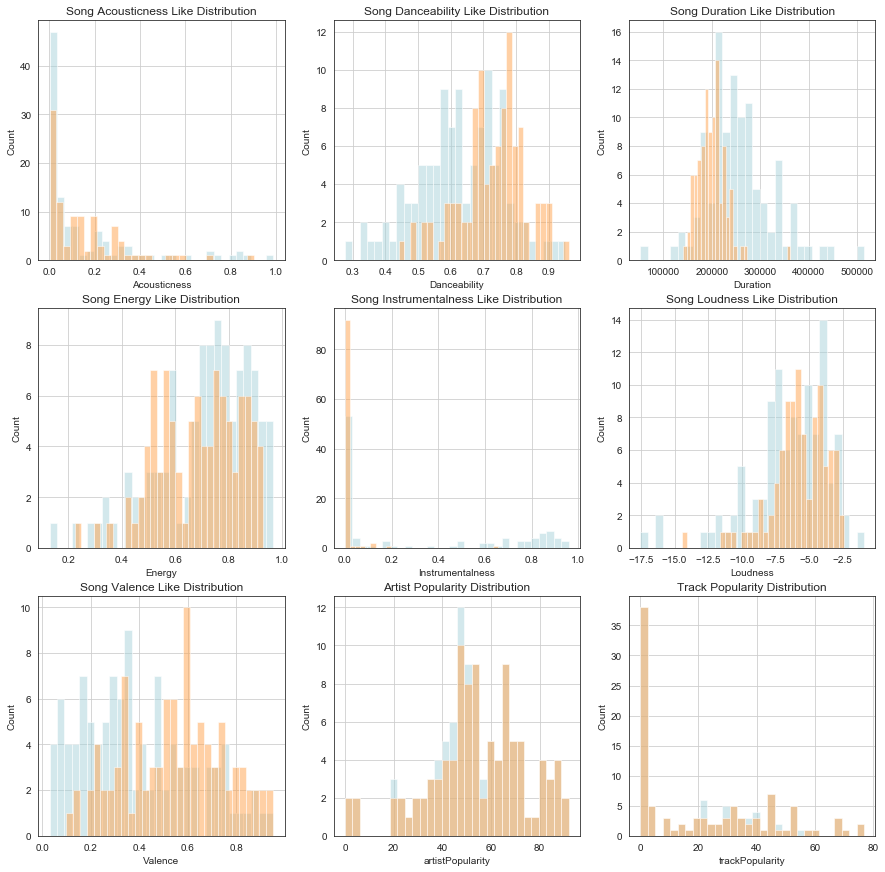

In [30]:
fig2 = plt.figure(figsize=(15,15))

# Acousticness
ax3 = fig2.add_subplot(331)
ax3.set_xlabel('Acousticness')
ax3.set_ylabel('Count')
ax3.set_title('Song Acousticness Like Distribution')
pos_acousticness.hist(alpha= 0.5, bins=30)
ax4 = fig2.add_subplot(331)
neg_acousticness.hist(alpha= 0.5, bins=30)

# Danceability
ax3 = fig2.add_subplot(332)
ax3.set_xlabel('Danceability')
ax3.set_ylabel('Count')
ax3.set_title('Song Danceability Like Distribution')
pos_dance.hist(alpha= 0.5, bins=30)
ax4 = fig2.add_subplot(332)
neg_dance.hist(alpha= 0.5, bins=30)

# Duration_ms
ax5 = fig2.add_subplot(333)
ax5.set_xlabel('Duration')
ax5.set_ylabel('Count')
ax5.set_title('Song Duration Like Distribution')
pos_duration.hist(alpha= 0.5, bins=30)
ax6 = fig2.add_subplot(333)
neg_duration.hist(alpha= 0.5, bins=30)

# Energy
ax13 = fig2.add_subplot(334)
ax13.set_xlabel('Energy')
ax13.set_ylabel('Count')
ax13.set_title('Song Energy Like Distribution')
pos_energy.hist(alpha= 0.5, bins=30)
ax14 = fig2.add_subplot(334)
neg_energy.hist(alpha= 0.5, bins=30)

# Instrumentalness
ax9 = fig2.add_subplot(335)
ax9.set_xlabel('Instrumentalness')
ax9.set_ylabel('Count')
ax9.set_title('Song Instrumentalness Like Distribution')
pos_instrumentalness.hist(alpha= 0.5, bins=30)
ax10 = fig2.add_subplot(335)
neg_instrumentalness.hist(alpha= 0.5, bins=30)

# Loudness
ax7 = fig2.add_subplot(336)
ax7.set_xlabel('Loudness')
ax7.set_ylabel('Count')
ax7.set_title('Song Loudness Like Distribution')
pos_loudness.hist(alpha= 0.5, bins=30)
ax8 = fig2.add_subplot(336)
neg_loudness.hist(alpha= 0.5, bins=30)

# Valence
ax11 = fig2.add_subplot(337)
ax11.set_xlabel('Valence')
ax11.set_ylabel('Count')
ax11.set_title('Song Valence Like Distribution')
pos_valence.hist(alpha= 0.5, bins=30)
ax12 = fig2.add_subplot(337)
neg_valence.hist(alpha= 0.5, bins=30)

# Artist Popularity
ax15 = fig2.add_subplot(338)
ax15.set_xlabel('artistPopularity')
ax15.set_ylabel('Count')
ax15.set_title('Artist Popularity Distribution')
pos_a_popularity.hist(alpha= 0.5, bins=30)
ax16 = fig2.add_subplot(338)
neg_a_popularity.hist(alpha= 0.5, bins=30)

# Track Popularity
ax15 = fig2.add_subplot(339)
ax15.set_xlabel('trackPopularity')
ax15.set_ylabel('Count')
ax15.set_title('Track Popularity Distribution')
pos_popularity.hist(alpha= 0.5, bins=30)
ax16 = fig2.add_subplot(339)
neg_popularity.hist(alpha= 0.5, bins=30);


# Scaling, Train Test

In [31]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# traditional 70-30.
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30, random_state=42)

print(f"Our new train set has {x_train.shape[0]} data points;",
      f"{np.sum(y_train)} of which are actual positives.")

Our new train set has 144 data points; 76 of which are actual positives.


Let's look at some classifiers!!!

# KNeighbors Classifier

Starting with the initial classifier.

In [32]:
distances = [2]
# p value = p is minkowski, 1 is manhattan, and 2 is euclidean.
from sklearn.neighbors import KNeighborsClassifier

for p in distances:
    knn = KNeighborsClassifier(p=2, metric='euclidean')
    knn.fit(x_train, y_train)
    
knn_pred = knn.predict(x_test)
    
score = accuracy_score(y_test, knn_pred) * 100
print("Accuracy using knn: ", round(score, 1), "%")


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

Accuracy using knn:  69.8 %


In [36]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, knn_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.6995967741935484

# Gaussian Naive Bayes

In [37]:
from sklearn.naive_bayes import GaussianNB
gauss = GaussianNB()
gauss.fit(x_train, y_train)
gauss_pred = gauss.predict(x_test)
score = accuracy_score(y_test, gauss_pred)*100
print("Accuracy using gauss: ", round(score, 1), "%")

GaussianNB(priors=None, var_smoothing=1e-09)

Accuracy using gauss:  84.1 %


Feels like we have a winner here.

# SVM

In [38]:
# things we need to check here are degree, gamma, C, kernel)
from sklearn.svm import SVC
svc_lin = SVC(kernel="linear", C=0.025)
svc_lin.fit(x_train, y_train)
svc_pred = svc_lin.predict(x_test)
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, svc_pred) * 100
print("Accuracy using svc linear: ", round(score, 1), "%")

SVC(C=0.025, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

Accuracy using svc linear:  50.8 %


Probably the weakest performing of the bunch.

# Decision Tree Classifier

In [39]:
# max depths (71.4%), min_samples_split (69.8%), min_samples_leaf (77.8%), max_features are we want to tweak.
# max_depths = np.linspace(1, 32, 32, endpoint=True)
# min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)

for min_samples_leaf in min_samples_leafs:
    c = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf)
    dt = c.fit(x_train, y_train)

In [40]:
train_pred = dt.predict(x_train)

In [41]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.7229102167182663

In [42]:
y_pred = c.predict(x_test)
score = accuracy_score(y_test, y_pred) * 100
print("Accuracy using decision tree: ", round(score, 1), "%")

Accuracy using decision tree:  73.0 %


We will use this value as the highest for decision tree.

In [44]:
# evaluation metric
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc


0.7293346774193549

# Random Forest Classifier

In [54]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(max_depth=8, n_estimators=30, max_features=1)
forest.fit(x_train, y_train)
forest_pred = forest.predict(x_test)

score = accuracy_score(y_test, forest_pred) * 100
print("Accuracy using random forest: ", round(score, 1), "%")

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=8, max_features=1, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Accuracy using random forest:  81.0 %


# Neural Network

In [47]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier()
mlp.fit(x_train, y_train)
mlp_pred = mlp.predict(x_test)
score = accuracy_score(y_test, mlp_pred) * 100
print("Accuracy using mlp: ", round(score, 1), "%")

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

Accuracy using mlp:  77.8 %


Have to take into account we're using the scikit learn version and this does not consider GPU support. Since we only have 200 samples, this should be fine.

# Adaptive Boosting

In [49]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=90)
ada.fit(x_train, y_train)
ada_pred = ada.predict(x_test)

score = accuracy_score(y_test, ada_pred) * 100
print("Accuracy using ada: ", round(score, 1), "%")

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=90, random_state=None)

Accuracy using ada:  71.4 %


# Gradient Boosting Classifier

In [59]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=30, learning_rate=.1, max_depth=1, random_state=0)
gbc.fit(x_train, y_train)
predicted = gbc.predict(x_test)
score = accuracy_score(y_test, predicted)*100
print("Accuracy using gbc: ", round(score, 1), "%")

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=1,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=30,
                           n_iter_no_change=None, presort='auto',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

Accuracy using gbc:  85.7 %


# Classify the songs we might like from a Lo-Fi playlist.

In [60]:
# ahh, shit. That Java naming convention tho.
playlistToFindSongsYouLikeIn = sp.user_playlist("spotify", "3tCeZnTCOrjNgQ7S2LBt4f")

newPlaylist_tracks = playlistToFindSongsYouLikeIn["tracks"]
newPlaylist_songs = newPlaylist_tracks["items"] 
while newPlaylist_tracks['next']:
    newPlaylist_tracks = sp.next(newPlaylist_tracks)
    for song in newPlaylist_tracks["items"]:
        newPlaylist_songs.append(song)
        
newPlaylist_song_ids = [] 
print(len(newPlaylist_songs))
for i in range(len(newPlaylist_songs)):
    newPlaylist_song_ids.append(newPlaylist_songs[i]['track']['id'])
    
newPlaylist_features = []
j = 0
for i in range(0,len(newPlaylist_song_ids),50):
    audio_features = sp.audio_features(newPlaylist_song_ids[i:i+50])
    for track in audio_features:
        track['artist'] = newPlaylist_songs[j]['track']['artists'][0]['name']
        track['name'] = newPlaylist_songs[j]['track']['name']
        track['trackPopularity'] = newPlaylist_songs[j]['track']['popularity']
        track['artistPopularity'] = sp.artist(newPlaylist_songs[j]['track']['artists'][0]['id'])['popularity']
        j= j + 1
        newPlaylist_features.append(track)
print(len(newPlaylist_features))

playlistToLookAtFeatures = pd.DataFrame(newPlaylist_features)

42
42


In [61]:
playlistToLookAtFeatures.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,artist,name,trackPopularity,artistPopularity
0,0.534,0.239,9,-9.982,0,0.1810,0.696,0.83100,0.1000,0.289,...,4DHsJVkruyHe99FQfSdmls,spotify:track:4DHsJVkruyHe99FQfSdmls,https://api.spotify.com/v1/tracks/4DHsJVkruyHe...,https://api.spotify.com/v1/audio-analysis/4DHs...,143667,4,Kupla,fell in love in a dream,0,70
1,0.500,0.596,4,-12.362,0,0.5670,0.867,0.00268,0.2780,0.554,...,4f9oMWvjUdIKCecE5LAeio,spotify:track:4f9oMWvjUdIKCecE5LAeio,https://api.spotify.com/v1/tracks/4f9oMWvjUdIK...,https://api.spotify.com/v1/audio-analysis/4f9o...,116757,4,[bsd.u],swishers,34,57
2,0.698,0.193,1,-15.010,1,0.0902,0.914,0.93700,0.0882,0.607,...,4p5eACHBSDSKxvPrN1Ej5p,spotify:track:4p5eACHBSDSKxvPrN1Ej5p,https://api.spotify.com/v1/tracks/4p5eACHBSDSK...,https://api.spotify.com/v1/audio-analysis/4p5e...,117495,4,Jinsang,Affection,6,67
3,0.661,0.363,1,-12.866,1,0.6760,0.716,0.36300,0.3300,0.882,...,3Rppo6uStUw9Nrtx8cBLEC,spotify:track:3Rppo6uStUw9Nrtx8cBLEC,https://api.spotify.com/v1/tracks/3Rppo6uStUw9...,https://api.spotify.com/v1/audio-analysis/3Rpp...,51187,4,Tomppabeats,The Girl Next Door,47,63
4,0.640,0.565,8,-8.439,0,0.2030,0.670,0.81600,0.0862,0.255,...,0H9nrujkGotc5jzZiY1zm6,spotify:track:0H9nrujkGotc5jzZiY1zm6,https://api.spotify.com/v1/tracks/0H9nrujkGotc...,https://api.spotify.com/v1/audio-analysis/0H9n...,158118,4,imagiro,Endless,10,52


In [62]:
features_two = playlistToLookAtFeatures[["danceability", "loudness", "valence", "energy", "artistPopularity", "instrumentalness", "acousticness","duration_ms", "trackPopularity"]]

Thought about doing another version of test split here but since we don't have a liked column opted to use the initial X and Y, train test.

# What's the result for the best classifier?

In [72]:
# It's time to predict which tracks belong to my edm chill playlist.
# We shall use the lofi playlist Bela played in class to test which tracks we shall take from it.
pred = gauss.predict(x_test)
 
score = accuracy_score(y_test, pred)*100
print("              Accuracy using gauss: ", round(score, 1), "%")
print(" ")
print(classification_report(y_test, pred))

likedSongs = 0
i = 0
for prediction in pred:
    if(prediction == 1):
        print ("Song: " + playlistToLookAtFeatures["name"][i] + ", By: "+ playlistToLookAtFeatures["artist"][i])
        likedSongs= likedSongs + 1
        i = i +1
    

              Accuracy using gauss:  84.1 %
 
              precision    recall  f1-score   support

           0       0.78      0.94      0.85        31
           1       0.92      0.75      0.83        32

    accuracy                           0.84        63
   macro avg       0.85      0.84      0.84        63
weighted avg       0.85      0.84      0.84        63

Song: fell in love in a dream, By: Kupla
Song: swishers, By: [bsd.u]
Song: Affection, By: Jinsang
Song: The Girl Next Door, By: Tomppabeats
Song: Endless, By: imagiro
Song: hold up, By: eevee
Song: i promise that i care much more than i show, By: furino
Song: Cold Seas, By: Jinsang
Song: The Girl I Haven't Met, By: Kudasaibeats
Song: The Struggle in the 90s, By: Lo'fi Boy
Song: Autumn Leaves, By: drkmnd
Song: Proporción Y No Cantidad, By: importmedia
Song: Chiyo, By: Kavv
Song: Imperial, By: j^p^n
Song: im just tired, By: Xfruge
Song: down by the brook, By: biosphere
Song: this girl, By: Elijah Who
Song: I Fall in Love 

So basically it scans the 42 songs that you picked and deems that the above 26 songs will fit your playlist based on Gaussian Naive Bayes. 

In [71]:
# It's a tie! Let's check the gradient boosting classifier.
pred = gbc.predict(x_test)
 
score = accuracy_score(y_test, pred)*100
print("              Accuracy using gbc: ", round(score, 1), "%")
print(" ")
print(classification_report(y_test, pred))

likedSongs = 0
i = 0
for prediction in pred:
    if(prediction == 1):
        print ("Song: " + playlistToLookAtFeatures["name"][i] + ", By: "+ playlistToLookAtFeatures["artist"][i])
        likedSongs= likedSongs + 1 
        i = i +1

              Accuracy using gbc:  85.7 %
 
              precision    recall  f1-score   support

           0       0.87      0.84      0.85        31
           1       0.85      0.88      0.86        32

    accuracy                           0.86        63
   macro avg       0.86      0.86      0.86        63
weighted avg       0.86      0.86      0.86        63

Song: fell in love in a dream, By: Kupla
Song: swishers, By: [bsd.u]
Song: Affection, By: Jinsang
Song: The Girl Next Door, By: Tomppabeats
Song: Endless, By: imagiro
Song: hold up, By: eevee
Song: i promise that i care much more than i show, By: furino
Song: Cold Seas, By: Jinsang
Song: The Girl I Haven't Met, By: Kudasaibeats
Song: The Struggle in the 90s, By: Lo'fi Boy
Song: Autumn Leaves, By: drkmnd
Song: Proporción Y No Cantidad, By: importmedia
Song: Chiyo, By: Kavv
Song: Imperial, By: j^p^n
Song: im just tired, By: Xfruge
Song: down by the brook, By: biosphere
Song: this girl, By: Elijah Who
Song: I Fall in Love To

So basically it scans the 42 songs that you picked and deems that the above 32 songs will fit your playlist based on Gradient Boosting Classifier. 

Future Recommendations:

- Haven't considered duplicates in another playlist. might need to do some tweaking on that for further studies.
- Come up with a recommendation score for the Song and Artist chosen.